<a href="https://colab.research.google.com/github/renmiamu/NUS_AI4fin/blob/main/ai4fi_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

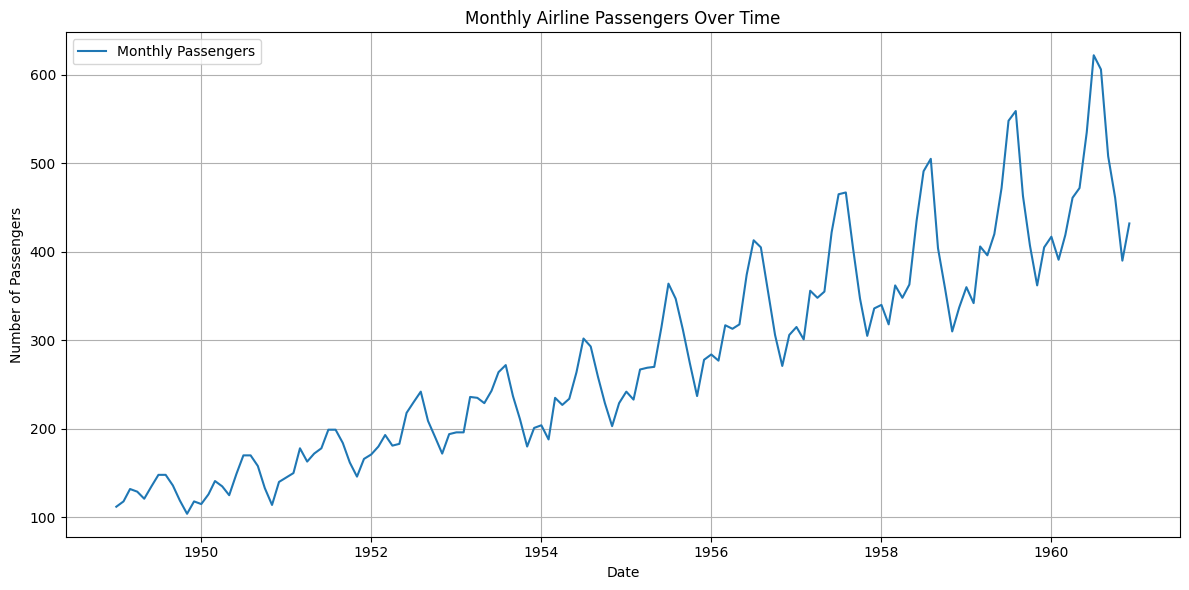

In [19]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

# 原始数据，复制你提供的数据到这里
data = """
"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136
"1949-10",119
"1949-11",104
"1949-12",118
"1950-01",115
"1950-02",126
"1950-03",141
"1950-04",135
"1950-05",125
"1950-06",149
"1950-07",170
"1950-08",170
"1950-09",158
"1950-10",133
"1950-11",114
"1950-12",140
"1951-01",145
"1951-02",150
"1951-03",178
"1951-04",163
"1951-05",172
"1951-06",178
"1951-07",199
"1951-08",199
"1951-09",184
"1951-10",162
"1951-11",146
"1951-12",166
"1952-01",171
"1952-02",180
"1952-03",193
"1952-04",181
"1952-05",183
"1952-06",218
"1952-07",230
"1952-08",242
"1952-09",209
"1952-10",191
"1952-11",172
"1952-12",194
"1953-01",196
"1953-02",196
"1953-03",236
"1953-04",235
"1953-05",229
"1953-06",243
"1953-07",264
"1953-08",272
"1953-09",237
"1953-10",211
"1953-11",180
"1953-12",201
"1954-01",204
"1954-02",188
"1954-03",235
"1954-04",227
"1954-05",234
"1954-06",264
"1954-07",302
"1954-08",293
"1954-09",259
"1954-10",229
"1954-11",203
"1954-12",229
"1955-01",242
"1955-02",233
"1955-03",267
"1955-04",269
"1955-05",270
"1955-06",315
"1955-07",364
"1955-08",347
"1955-09",312
"1955-10",274
"1955-11",237
"1955-12",278
"1956-01",284
"1956-02",277
"1956-03",317
"1956-04",313
"1956-05",318
"1956-06",374
"1956-07",413
"1956-08",405
"1956-09",355
"1956-10",306
"1956-11",271
"1956-12",306
"1957-01",315
"1957-02",301
"1957-03",356
"1957-04",348
"1957-05",355
"1957-06",422
"1957-07",465
"1957-08",467
"1957-09",404
"1957-10",347
"1957-11",305
"1957-12",336
"1958-01",340
"1958-02",318
"1958-03",362
"1958-04",348
"1958-05",363
"1958-06",435
"1958-07",491
"1958-08",505
"1958-09",404
"1958-10",359
"1958-11",310
"1958-12",337
"1959-01",360
"1959-02",342
"1959-03",406
"1959-04",396
"1959-05",420
"1959-06",472
"1959-07",548
"1959-08",559
"1959-09",463
"1959-10",407
"1959-11",362
"1959-12",405
"1960-01",417
"1960-02",391
"1960-03",419
"1960-04",461
"1960-05",472
"1960-06",535
"1960-07",622
"1960-08",606
"1960-09",508
"1960-10",461
"1960-11",390
"1960-12",432
"""


# 读取数据为 DataFrame
df = pd.read_csv(StringIO(data))

# 将字符串日期转为 datetime 类型
df["Month"] = pd.to_datetime(df["Month"])

# 设置为时间索引
df.set_index("Month", inplace=True)

# 画图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Passengers"], label="Monthly Passengers")
plt.title("Monthly Airline Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [21]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [22]:
# 读取数据
dataframe = pd.read_csv(StringIO(data))

# 只选取 Passengers 列
passengers = dataframe["Passengers"].values

# 转换为 float32 类型
dataset = passengers.astype('float32')

In [23]:
# dataset 是一维的 [112., 118., 132., ...]
dataset = dataset.reshape(-1, 1)

# 正规化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [24]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [26]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 23ms/step - loss: 0.0409
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0197
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0150
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0137
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0128
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0118
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0108
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0098
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0089
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0079
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0070
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0061
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0053
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0046
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0040
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0035
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0031
Epoch 18/100
94/94 - 0s - 4ms/step - loss: 0.0028
Epoch 19/100
94/94 - 1s - 7ms/step - loss: 0.0025
Epoch 20/100
94/94 - 1s - 6ms/step - loss: 0.0024
Epoch 21/100
94/94 -

In [29]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train Score: 22.84 RMSE
Test Score: 48.98 RMSE


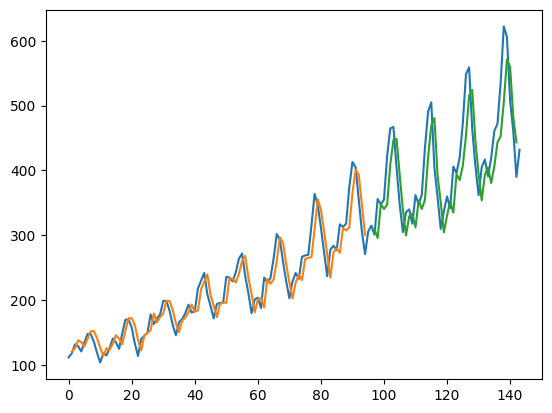

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()